In [0]:
# Configuração do Blob Storage
storage_account_name = "xxx"
storage_account_key = "xxx"
container_name = "xxx"
mount_point = "/mnt/xxx"
 
# Montar o Blob Storage
dbutils.fs.mount(
    source = f"wasbs://{container_name}@{storage_account_name}.blob.core.windows.net",
    mount_point = mount_point,
    extra_configs = {f"fs.azure.account.key.{storage_account_name}.blob.core.windows.net": storage_account_key}
)

---------------------------------------------------------------------------
ExecutionError                            Traceback (most recent call last)
File <command-3665436833855895>:8
      5 mount_point = "/mnt/powerenergydb"
      7 # Montar o Blob Storage
----> 8 dbutils.fs.mount(
      9     source = f"wasbs://{container_name}@{storage_account_name}.blob.core.windows.net",
     10     mount_point = mount_point,
     11     extra_configs = {f"fs.azure.account.key.{storage_account_name}.blob.core.windows.net": storage_account_key}
     12 )

File /databricks/python_shell/dbruntime/dbutils.py:364, in DBUtils.FSHandler.prettify_exception_message.<locals>.f_with_exception_handling(*args, **kwargs)
    362 exc.__context__ = None
    363 exc.__cause__ = None
--> 364 raise exc

ExecutionError: An error occurred while calling o410.mount.
: java.rmi.RemoteException: java.lang.IllegalArgumentException: requirement failed: Directory already mounted: /mnt/powerenergydb; nested exception is: 


In [0]:
# Listar os arquivos no contêiner
display(dbutils.fs.ls("/mnt/xxx"))

path,name,size,modificationTime
dbfs:/mnt/powerenergydb/climate_change_data.csv,climate_change_data.csv,1669507,1732032047000


In [0]:
# Caminho do arquivo
file_path = "/mnt/xxx/climate_change_data.csv"
 
# Ler o arquivo CSV para um DataFrame
df = spark.read.csv(file_path, header=True, inferSchema=True)
 
# Exibir as primeiras linhas do DataFrame
df.show(10)

# Ler o número de registros 
print(f"Número total de registros: {df.count()}")

+--------------------+----------------+-------------+------------------+------------------+--------------------+------------------+------------------+------------------+
|                Date|        Location|      Country|       Temperature|     CO2 Emissions|      Sea Level Rise|     Precipitation|          Humidity|        Wind Speed|
+--------------------+----------------+-------------+------------------+------------------+--------------------+------------------+------------------+------------------+
| 2000-01-01 00:00:00| New Williamtown|       Latvia|10.688985961440224|  403.118902532313|  0.7175060280487084|13.835236935170093|23.631256224753127|18.492026001060687|
|2000-01-01 20:09:...|    North Rachel| South Africa|13.814430285994883|396.66349928864787|   1.205714577973989| 40.97408400927044|43.982945512578134| 34.24929982477023|
|2000-01-02 16:19:...|West Williamland|French Guiana| 27.32371775936091| 451.5531550541853|-0.16078297043172432| 42.69793130058377| 96.65259963507044|

In [0]:
df.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Location: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- CO2 Emissions: double (nullable = true)
 |-- Sea Level Rise: double (nullable = true)
 |-- Precipitation: double (nullable = true)
 |-- Humidity: double (nullable = true)
 |-- Wind Speed: double (nullable = true)



In [0]:
df.describe().show()

+-------+-----------+-----------+------------------+-----------------+--------------------+--------------------+------------------+--------------------+
|summary|   Location|    Country|       Temperature|    CO2 Emissions|      Sea Level Rise|       Precipitation|          Humidity|          Wind Speed|
+-------+-----------+-----------+------------------+-----------------+--------------------+--------------------+------------------+--------------------+
|  count|      10000|      10000|             10000|            10000|               10000|               10000|             10000|               10000|
|   mean|       null|       null| 14.93603377863015|400.2204688976376|-0.00315168548374...|   49.88120758239161|49.771301928591484|  25.082065534372408|
| stddev|       null|       null| 5.030615849200168| 49.6969327066168|  0.9913486683740705|  28.862417088869915| 28.92932002726051|    14.4666480385455|
|    min|  Aaronberg|Afghanistan|-3.803588598564197|182.1312203487651|  -4.0921549

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [0]:
assembler = VectorAssembler(inputCols=["Temperature"], outputCol="features")
df_features = assembler.transform(df).select("features", "Sea Level Rise")
 
   # Treinar o modelo
lr = LinearRegression(featuresCol="features", labelCol="Sea Level Rise")
lr_model = lr.fit(df_features)
 
   # Exibir métricas
print(f"Coeficiente: {lr_model.coefficients}")
print(f"Intercepto: {lr_model.intercept}")
print(f"R2: {lr_model.summary.r2}")


Coeficiente: [0.0022983597320838096]
Intercepto: -0.03748006407759302
R2: 0.0001360271072784469


In [0]:
import matplotlib.pyplot as plt
import pyspark.pandas as ps

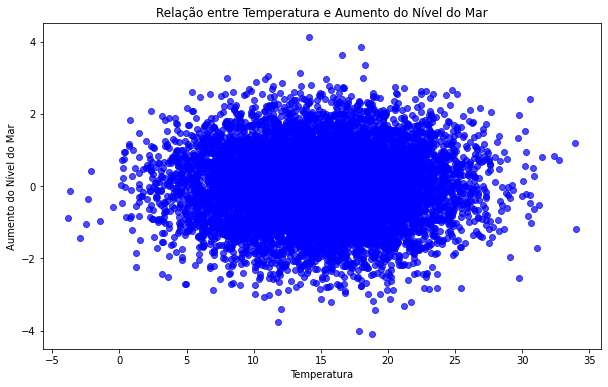

In [0]:
# Importando os dados
df_relacionamento = ps.read_csv('/mnt/xxx/climate_change_data.csv')

# Convertendo para Pandas para usar o matplotlib diretamente
df_relacionamento_pandas = df_relacionamento.to_pandas()

# Ajustando o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(df_relacionamento_pandas['Temperature'],
df_relacionamento_pandas['Sea Level Rise'], color='blue', alpha=0.7)

# Adicionando título e rótulos aos eixos
plt.title("Relação entre Temperatura e Aumento do Nível do Mar")
plt.xlabel("Temperatura")
plt.ylabel("Aumento do Nível do Mar")
plt.show()

In [0]:
pip install pymongo

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install --upgrade pymongo


Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
import pymongo
from random import randint
import json

In [0]:
def main():
    try:
        # Conectar ao MongoDB
        print("Tentando conectar ao MongoDB...")
        client = pymongo.MongoClient(CONNECTION_STRING, serverSelectionTimeoutMS=5000)
        client.server_info()  # Valida a conexão com o servidor
        print("Conexão estabelecida com sucesso!")
    except pymongo.errors.ServerSelectionTimeoutError as e:
        print(f"Erro de conexão: {e}")
        raise TimeoutError("Invalid API for MongoDB connection string or timed out when attempting to connect")
    except Exception as e:
        print(f"Erro inesperado: {e}")
        raise


In [0]:
# Configurações do MongoDB
CONNECTION_STRING = "xxx"
DB_NAME = "xxx"
UNSHARDED_COLLECTION_NAME = "xxx"

# Função para salvar documentos no MongoDB
def save_documents(collection, documents):
    for document in documents:
        collection.insert_one(document)
        print("Inserted document:", document)
    print("Saved {} documents to the collection".format(len(documents)))

# Função principal
def main():
    try:
        # Conectar ao MongoDB
        client = pymongo.MongoClient(CONNECTION_STRING, serverSelectionTimeoutMS=9000)  
        client.server_info()  # Valida a conexão com o servidor
    except pymongo.errors.ServerSelectionTimeoutError:
        raise TimeoutError("Invalid API for MongoDB connection string or timed out when attempting to connect")
    
    # Acessar banco de dados e coleção
    banco = client[DB_NAME]
    collection = banco[UNSHARDED_COLLECTION_NAME]

    # Certifique-se de que `df_relacionamento_pandas` está definido antes de usar esta linha
    # Convertendo DataFrame do Pandas para uma lista JSON de documentos
    documents = json.loads(df_relacionamento_pandas.to_json(orient="records"))

    # Salvar documentos na coleção
    save_documents(collection, documents)

# Executa o script
if __name__ == '__main__': 
    main()


<command-3665436833855901>:17: UserWarning: You appear to be connected to a CosmosDB cluster. For more information regarding feature compatibility and support please visit https://www.mongodb.com/supportability/cosmosdb
  client = pymongo.MongoClient(CONNECTION_STRING, serverSelectionTimeoutMS=90000)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "<command-3665436833855901>", line 18, in main
    client.server_info()  # Valida a conexão com o servidor
  File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-52e1ebe4-b89e-4b15-b787-02ef107b014a/lib/python3.9/site-packages/pymongo/synchronous/mongo_client.py", line 2125, in server_info
    self.admin.command(
  File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-52e1ebe4-b89e-4b15-b787-02ef107b014a/lib/python3.9/site-packages/pymongo/_csot.py", line 119, in csot_wrapper
    return func(self, *args, **kwargs)
  File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-52e1ebe4-b89e-4b15-b787-02ef107b014a/lib/python3.9/site-packages/pymongo/synchronous/database.py", line 926, in command
    with self._client._conn_for_reads(read_preference, session, operation=command_name) as (
  File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-52e1ebe4-b89e-4b15-b787-02ef107b014a/lib/python3.9/site-packages/pymongo/synchronous/mongo_client.py", line 1701, in _conn_for_reads

In [0]:
# Configuração do Cosmos DB
CONNECTION_STRING = "xxx"
DB_NAME = "xxx"
COLLECTION_NAME = "xxx"

# Carregar o dataset do Blob Storage
df = spark.read.csv("/mnt/xxx/climate_change_data.csv", header=True, inferSchema=True)

# Mostrar as primeiras linhas para garantir que o dataset foi carregado corretamente
df.show(5)

# Converter o DataFrame Spark para Pandas
df_pandas = df.select("Temperature", "CO2 Emissions", "Sea Level Rise", "Precipitation", "Humidity", "Wind Speed").toPandas()

# Converter os dados para o formato JSON
documents = json.loads(df_pandas.to_json(orient="records"))

# Função para salvar os documentos no Cosmos DB
def save_to_cosmosdb(connection_string, database_name, collection_name, documents):
    """
    Salva uma lista de documentos no Cosmos DB.
    """
    # Conectar ao Cosmos DB
    client = pymongo.MongoClient(connection_string)
    db = client[database_name]
    collection = db[collection_name]

    # Inserir os documentos no banco
    for document in documents:
        collection.insert_one(document)
        print(f"Inserted document: {document}")
    
    print(f"Saved {len(documents)} documents to {collection_name} collection.")

# Salvar os dados no Cosmos DB
save_to_cosmosdb(CONNECTION_STRING, DB_NAME, COLLECTION_NAME, documents)

+--------------------+----------------+-------------+------------------+------------------+--------------------+------------------+------------------+------------------+
|                Date|        Location|      Country|       Temperature|     CO2 Emissions|      Sea Level Rise|     Precipitation|          Humidity|        Wind Speed|
+--------------------+----------------+-------------+------------------+------------------+--------------------+------------------+------------------+------------------+
| 2000-01-01 00:00:00| New Williamtown|       Latvia|10.688985961440224|  403.118902532313|  0.7175060280487084|13.835236935170093|23.631256224753127|18.492026001060687|
|2000-01-01 20:09:...|    North Rachel| South Africa|13.814430285994883|396.66349928864787|   1.205714577973989| 40.97408400927044|43.982945512578134| 34.24929982477023|
|2000-01-02 16:19:...|West Williamland|French Guiana| 27.32371775936091| 451.5531550541853|-0.16078297043172432| 42.69793130058377| 96.65259963507044|

<command-3553856245269448>:24: UserWarning: You appear to be connected to a CosmosDB cluster. For more information regarding feature compatibility and support please visit https://www.mongodb.com/supportability/cosmosdb
  client = pymongo.MongoClient(connection_string)


---------------------------------------------------------------------------
ServerSelectionTimeoutError               Traceback (most recent call last)
File <command-3553856245269448>:36
     33     print(f"Saved {len(documents)} documents to {collection_name} collection.")
     35 # Salvar os dados no Cosmos DB
---> 36 save_to_cosmosdb(CONNECTION_STRING, DB_NAME, COLLECTION_NAME, documents)

File <command-3553856245269448>:30, in save_to_cosmosdb(connection_string, database_name, collection_name, documents)
     28 # Inserir os documentos no banco
     29 for document in documents:
---> 30     collection.insert_one(document)
     31     print(f"Inserted document: {document}")
     33 print(f"Saved {len(documents)} documents to {collection_name} collection.")

File /local_disk0/.ephemeral_nfs/envs/pythonEnv-52e1ebe4-b89e-4b15-b787-02ef107b014a/lib/python3.9/site-packages/pymongo/synchronous/collection.py:891, in Collection.insert_one(self, document, bypass_document_validation, session,